In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
from sklearn.neural_network import MLPRegressor
%matplotlib inline
sns.set()

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

## Test - Train - Split

X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state=123)

In [2]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor

scores = []
best_val = 0
best_score = 0
maxIters = np.arange(1000, 52000, 5000)

for maxIter in maxIters:
    start_time = time.time()
    model = MLPRegressor(max_iter=maxIter, random_state=123, batch_size=90)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    used_time = time.time() - start_time
    if score > best_score:
        best_score = score
        best_val = maxIter
    print(maxIter, score, used_time)

fig = sns.lineplot(x=maxIters, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)


/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


1000 0.8403948338093159 9.327885150909424
6000 0.8586260156792844 42.552817821502686
11000 0.8586260156792844 42.142208099365234
16000 0.8586260156792844 42.420554876327515
21000 0.8586260156792844 43.58534502983093
26000 0.8586260156792844 45.38603115081787
31000 0.8586260156792844 50.28366804122925
36000 0.8602331469592683 31.839109897613525


10 0.8554633384779667 155.94157600402832
20 0.8587306323047664 104.13508677482605
30 0.8459894892368608 128.24607610702515
40 0.8624898321336263 105.52019596099854
50 0.861657267270596 93.83267211914062
60 0.858176044207005 153.4552619457245
70 0.8626582397954772 125.2725920677185
80 0.8615636525636532 191.05403804779053
90 0.8672171184331745 67.99517107009888
100 0.858572537186322 207.73838901519775
110 0.859516358537807 184.78057384490967
120 0.8533679455437597 260.47557497024536
130 0.8484515430359975 268.1589410305023
140 0.8339704543484059 280.4204978942871
best_val   =  90
best_score =  0.8672171184331745


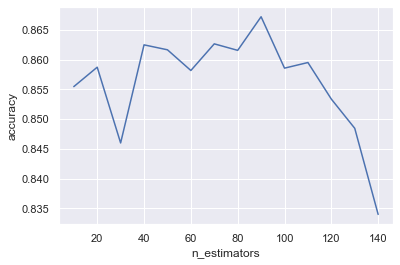

In [12]:
#Grösser 35000 reicht aus
# Die "relu" activation ergibt die Besten Werte
scores = []
best_val = 0
best_score = 0
batch_sizes = np.arange(10, 150, 10)

for batch_size in batch_sizes:
    start_time = time.time()
    model = MLPRegressor(max_iter=35000, random_state=123, batch_size=batch_size)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    used_time = time.time() - start_time
    if score > best_score:
        best_score = score
        best_val = batch_size
    print(batch_size, score, used_time)

fig = sns.lineplot(x=batch_sizes, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

In [ ]:
# best batchsize is 90

start_time = time.time()
model = MLPRegressor(max_iter=35000, random_state=123, batch_size=90)
model.fit(X_train_sc, y_train)
score = model.score(X_test_sc, y_test)
used_time = time.time() - start_time
print(score, used_time)